In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency, pearsonr
from scipy import stats

In [3]:
df = pd.read_csv(r"C:\Users\hugoe\Desktop\LABS\lab-eda-bivariate\archive\amz_uk_price_prediction_dataset.csv")
df.head()

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers


In [5]:
df.columns

Index(['uid', 'asin', 'title', 'stars', 'reviews', 'price', 'isBestSeller',
       'boughtInLastMonth', 'category'],
      dtype='object')

In [7]:
crosstab = pd.crosstab(df["category"], df["isBestSeller"])
crosstab

isBestSeller,False,True
category,,
3D Printers,247,1
3D Printing & Scanning,4065,2
Abrasive & Finishing Products,245,5
Action Cameras,1696,1
Adapters,251,3
...,...,...
Wind Instruments,243,7
Window Treatments,234,5
Women,17559,213


In [9]:
crosstab["Proportion"] = crosstab[True] / (crosstab[True] + crosstab[False])

In [11]:
crosstab_sorted = crosstab.sort_values("Proportion", ascending=False)
crosstab_sorted

isBestSeller,False,True,Proportion
category,,,
Grocery,9008,556,0.058135
Smart Home Security & Lighting,98,6,0.057692
Health & Personal Care,9017,552,0.057686
Mobile Phone Accessories,248,11,0.042471
Power & Hand Tools,8353,306,0.035339
...,...,...,...
"CD, Disc & Tape Players",8798,0,0.000000
General Music-Making Accessories,259,0,0.000000
Snowboard Boots,1449,0,0.000000


In [13]:
chi2, p, dof, expected = chi2_contingency(crosstab)
chi2, p, dof, expected

(36684.23786636857,
 0.0,
 590,
 array([[2.47193964e+02, 8.09882713e-01, 1.85076756e-04],
        [4.05371625e+03, 1.32812090e+01, 3.03506057e-03],
        [2.49203347e+02, 8.16466063e-01, 1.86581203e-04],
        [1.69145759e+03, 5.54173022e+00, 1.26641233e-03],
        [2.53182120e+02, 8.29501733e-01, 1.89560152e-04],
        [8.50215078e+03, 2.78556353e+01, 6.36565092e-03],
        [1.06659816e+02, 3.49450041e-01, 7.98573411e-05],
        [2.57176598e+02, 8.42588862e-01, 1.92550861e-04],
        [9.51783364e+03, 3.11833217e+01, 7.12610350e-03],
        [1.50008640e+04, 4.91473992e+01, 1.12313068e-02],
        [9.32544259e+03, 3.05529901e+01, 6.98205827e-03],
        [2.38244365e+02, 7.80561099e-01, 1.78376096e-04],
        [3.22941764e+03, 1.05805557e+01, 2.41789941e-03],
        [9.44704154e+03, 3.09513853e+01, 7.07310070e-03],
        [6.68808280e+03, 2.19121962e+01, 5.00743888e-03],
        [5.26284806e+02, 1.72426931e+00, 3.94035044e-04],
        [1.90296406e+04, 6.23468982e+01,

In [15]:
n = crosstab.sum().sum()  # Número total de observaciones
min_dim = min(crosstab.shape) - 1  # Menor dimensión entre las filas y las columnas
cramers_v = np.sqrt(chi2 / (n * min_dim))
cramers_v

0.08663731815334759

<Axes: xlabel='category'>

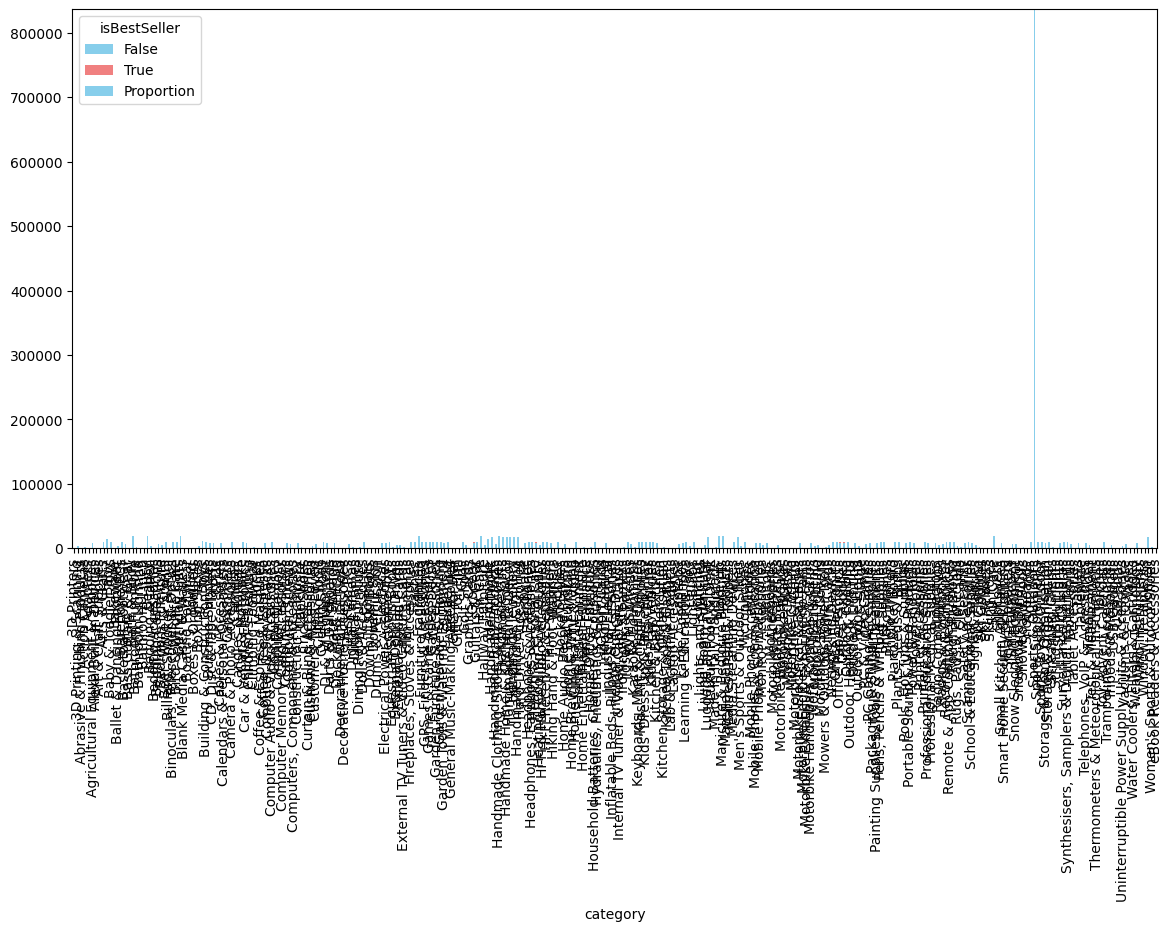

In [17]:
crosstab.plot(kind="bar", stacked=True, figsize=(14, 7), color=["skyblue", "lightcoral"])


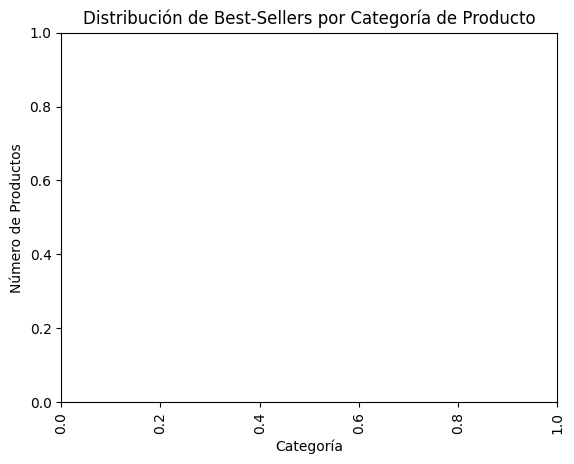

In [18]:
plt.title("Distribución de Best-Sellers por Categoría de Producto")
plt.xlabel("Categoría")
plt.ylabel("Número de Productos")
plt.xticks(rotation=90)  # Rotar las etiquetas de categoría
plt.show()

In [21]:
Q1 = df["price"].quantile(0.25)
Q3 = df["price"].quantile(0.75)
IQR = Q3 - Q1
IQR

36.0

In [23]:
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

In [25]:
df_no_outliers = df[(df["price"] >= lower_limit) & (df["price"] <= upper_limit)]
df_no_outliers

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers
...,...,...,...,...,...,...,...,...,...
2443646,2828589,B0CHSD7P2Q,"Motorbike Armour, Motorbike Clothing, Cycling ...",0.0,0,22.34,False,0,Motorbike Clothing
2443647,2828590,B0B7B8FNBQ,PROFIRST Waterproof Motorcycle 2 Piece Ladies ...,0.0,0,97.99,False,0,Motorbike Clothing
2443648,2828591,B0BD5FL5FB,Men’s Motorcycle Motorbike Biker Trousers Kevl...,0.0,0,52.99,False,0,Motorbike Clothing
2443649,2828592,B008OYLL4I,Texpeed Mens Motorcycle Motorbike Biker Trouse...,4.3,404,79.99,False,0,Motorbike Clothing


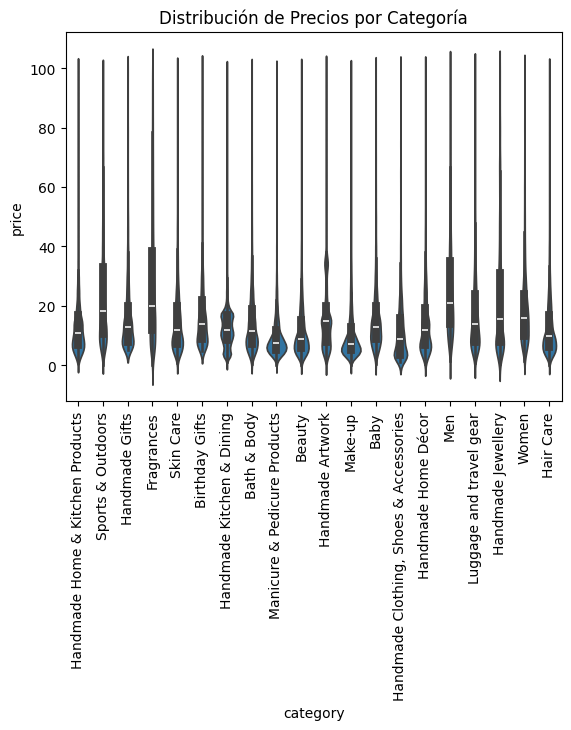

In [35]:
top_20_categories = df_no_outliers['category'].value_counts().head(20).index
df_top_20 = df_no_outliers[df_no_outliers['category'].isin(top_20_categories)]

sns.violinplot(x='category', y='price', data=df_top_20)
plt.xticks(rotation=90)
plt.title('Distribución de Precios por Categoría')
plt.show()

C:\Users\hugoe\AppData\Local\Temp\ipykernel_12952\2143224725.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="category", y="price", data=df, palette="muted")


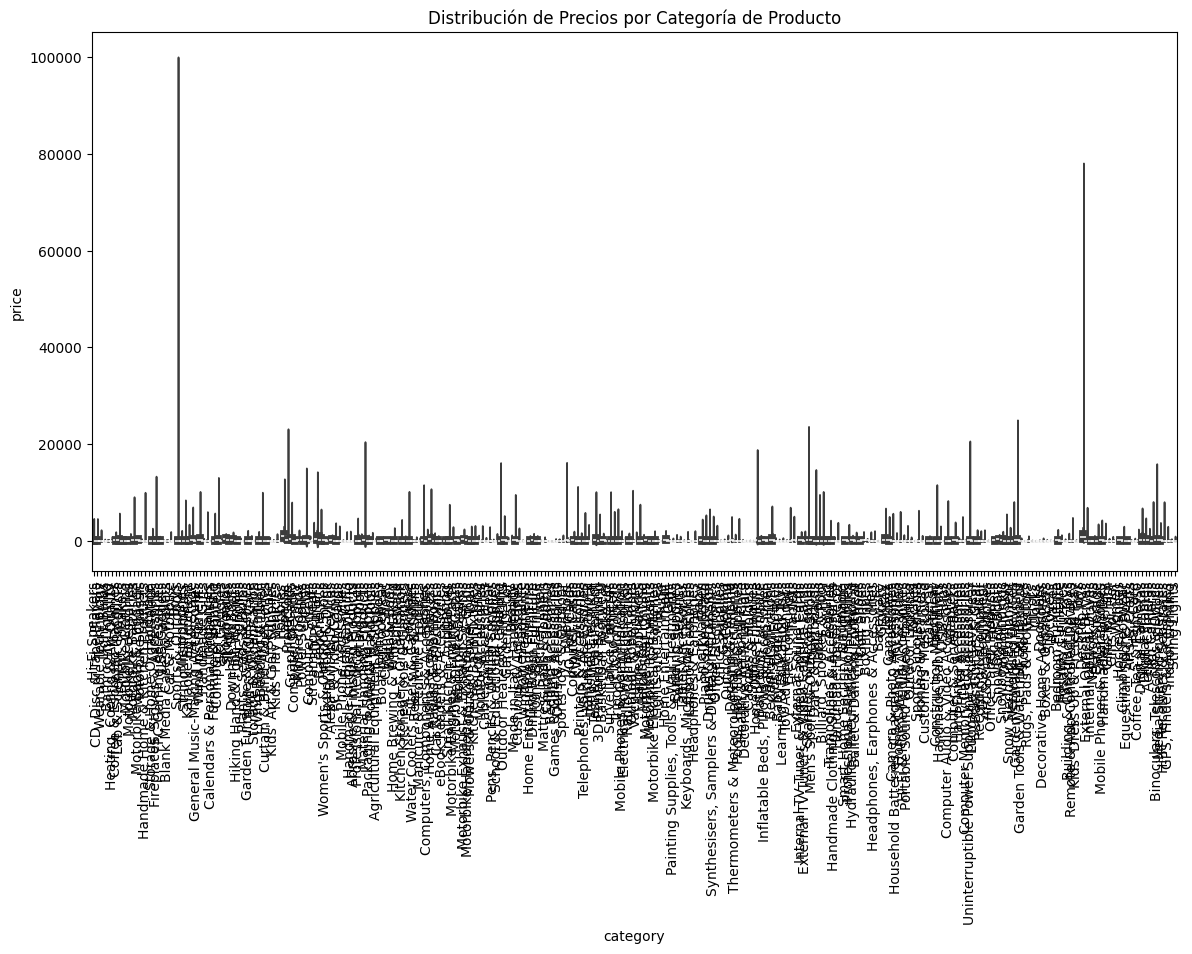

In [37]:
plt.figure(figsize=(14, 7))
sns.violinplot(x="category", y="price", data=df, palette="muted")
plt.title("Distribución de Precios por Categoría de Producto")
plt.xticks(rotation=90)  # Rotar las etiquetas del eje X
plt.show()

In [ ]:
median_prices = df.groupby("category")["price"].median().sort_values(ascending=False)
median_prices

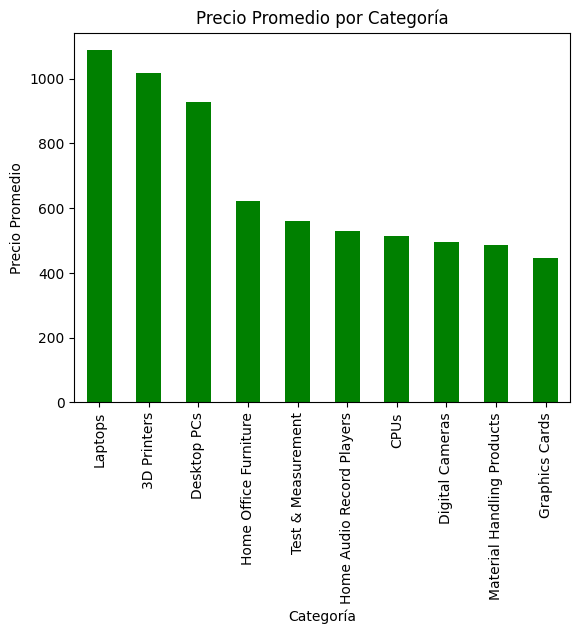

In [43]:
# Calcular precios promedio por categoría
average_prices = df.groupby('category')['price'].mean().sort_values(ascending=False).head(10)

# Crear gráfico de barras
average_prices.plot(kind='bar', color ="green")
plt.title('Precio Promedio por Categoría')
plt.xlabel('Categoría')
plt.ylabel('Precio Promedio')
plt.show()

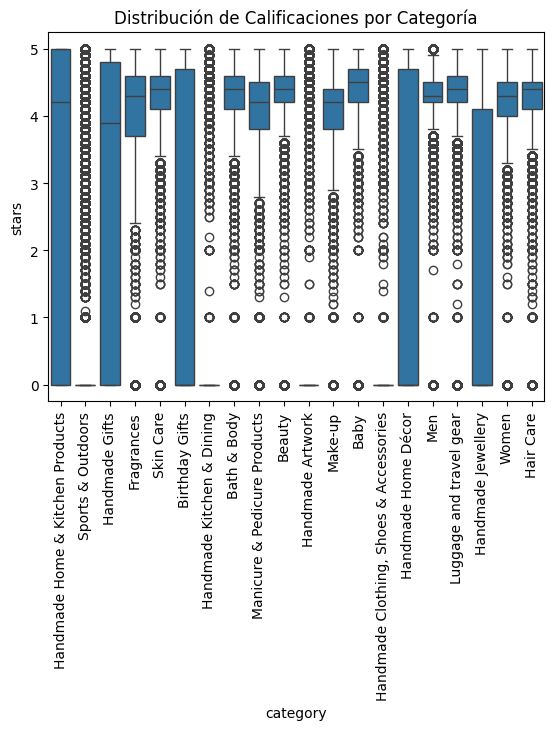

In [65]:
sns.boxplot(x='category', y='stars', data=df_top_20)
plt.xticks(rotation=90)
plt.title('Distribución de Calificaciones por Categoría')
plt.show()

C:\Users\hugoe\AppData\Local\Temp\ipykernel_12952\2810070888.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="category", y="stars", data=df_top_10_ratings, palette="Set3")


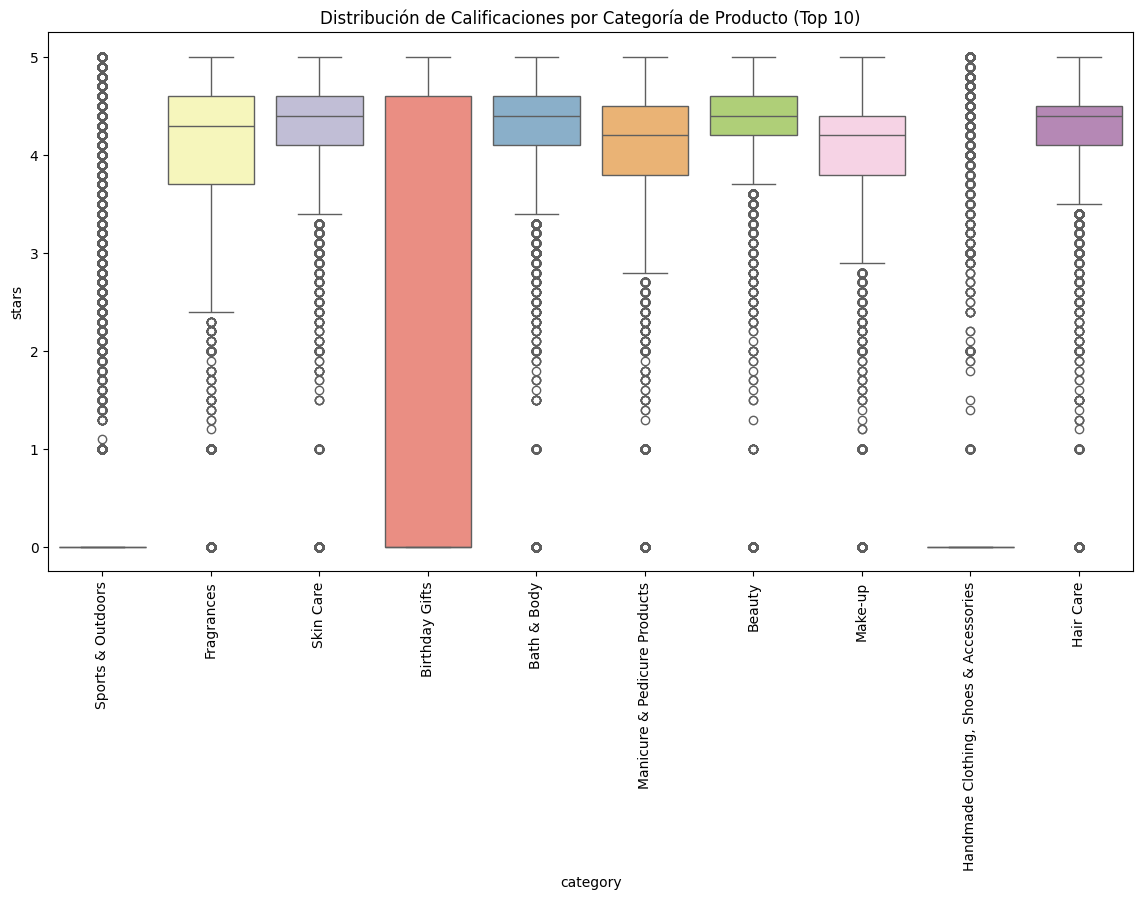

In [45]:
df_top_10_ratings = df[df["category"].isin(top_10_categories)]

plt.figure(figsize=(14, 7))
sns.boxplot(x="category", y="stars", data=df_top_10_ratings, palette="Set3")
plt.title("Distribución de Calificaciones por Categoría de Producto (Top 10)")
plt.xticks(rotation=90)
plt.show()

In [47]:
median_ratings = df.groupby("category")["stars"].median().sort_values(ascending=False)
median_ratings

category
Computer Memory                4.7
Hobbies                        4.6
Beer, Wine & Spirits           4.6
Laptop Accessories             4.6
Kids' Play Figures             4.6
                              ... 
KVM Switches                   0.0
Karaoke Equipment              0.0
Lab & Scientific Products      0.0
Laptops                        0.0
eBook Readers & Accessories    0.0
Name: stars, Length: 296, dtype: float64

In [69]:
correlation, _ = pearsonr(df_no_outliers['price'], df_no_outliers['stars'])
correlation, _

(-0.07767299878181351, 0.0)

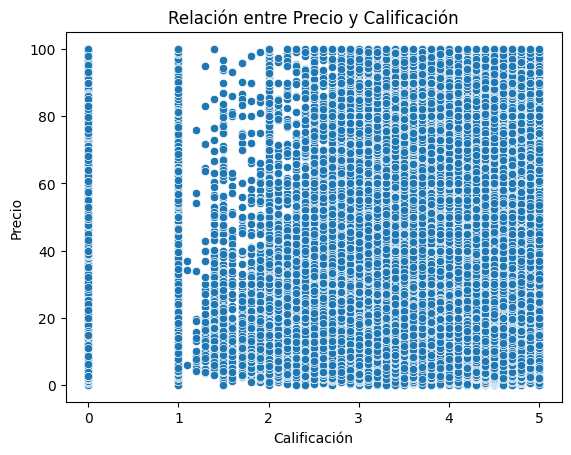

In [73]:
sns.scatterplot(x='stars', y='price', data=df_no_outliers)
plt.title('Relación entre Precio y Calificación')
plt.xlabel('Calificación')
plt.ylabel('Precio')
plt.show()


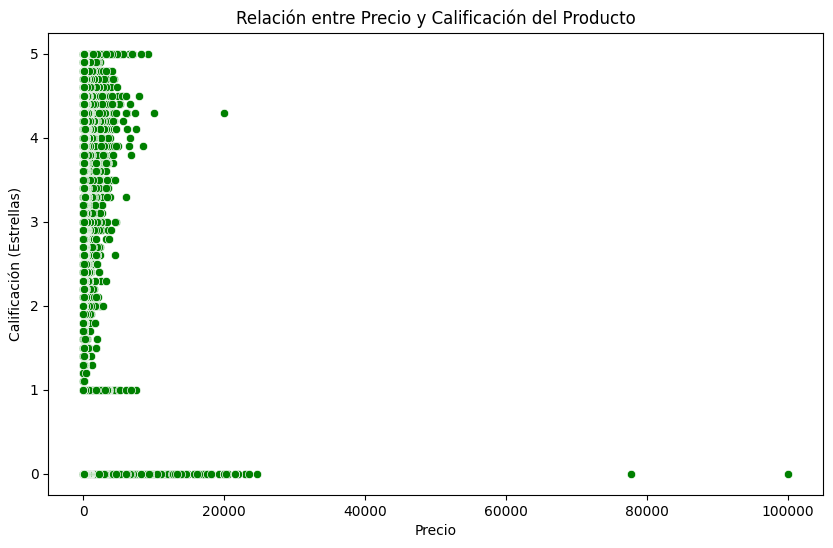

In [51]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x="price", y="stars", data=df, color="green")
plt.title("Relación entre Precio y Calificación del Producto")
plt.xlabel("Precio")
plt.ylabel("Calificación (Estrellas)")
plt.show()

In [52]:
numeric_df = df.select_dtypes(include=[np.number])
numeric_df

,uid,stars,reviews,price,boughtInLastMonth
0,1,4.7,15308,21.99,0
1,2,4.7,98099,23.99,0
2,3,4.7,15308,21.99,0
3,4,4.7,7205,31.99,0
4,5,4.6,1881,17.99,0
...,...,...,...,...,...
2443646,2828589,0.0,0,22.34,0
2443647,2828590,0.0,0,97.99,0
2443648,2828591,0.0,0,52.99,0
2443649,2828592,4.3,404,79.99,0


In [53]:
correlation_matrix = numeric_df.corr()
correlation_matrix

,uid,stars,reviews,price,boughtInLastMonth
uid,1.000000,0.031696,0.019994,0.008273,0.016336
stars,0.031696,1.000000,0.085808,-0.124907,0.112536
reviews,0.019994,0.085808,1.000000,-0.013171,0.104043
price,0.008273,-0.124907,-0.013171,1.000000,-0.023439
boughtInLastMonth,0.016336,0.112536,0.104043,-0.023439,1.000000


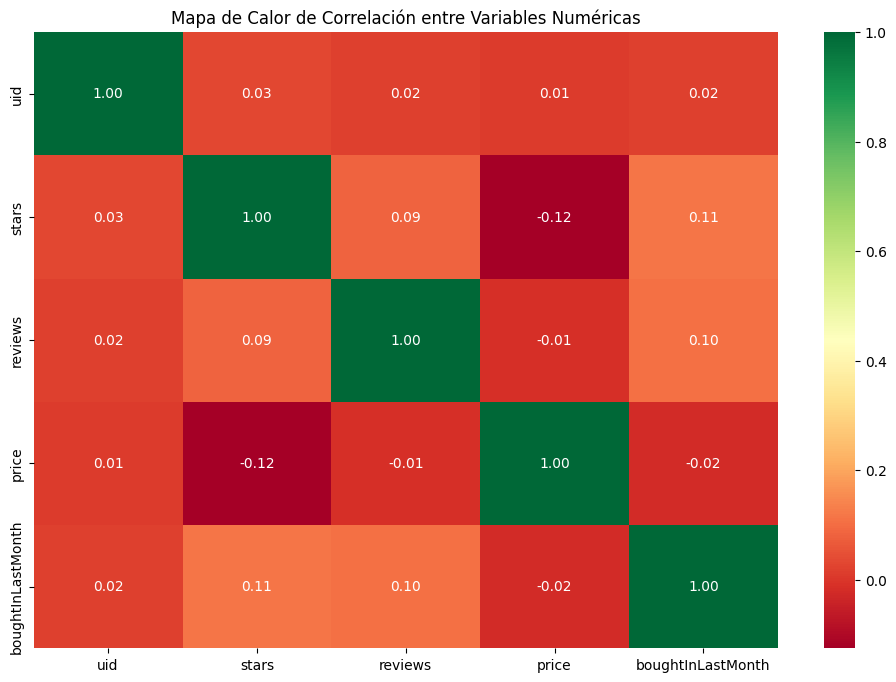

In [54]:
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="RdYlGn", fmt=".2f")
plt.title("Mapa de Calor de Correlación entre Variables Numéricas")
plt.show()

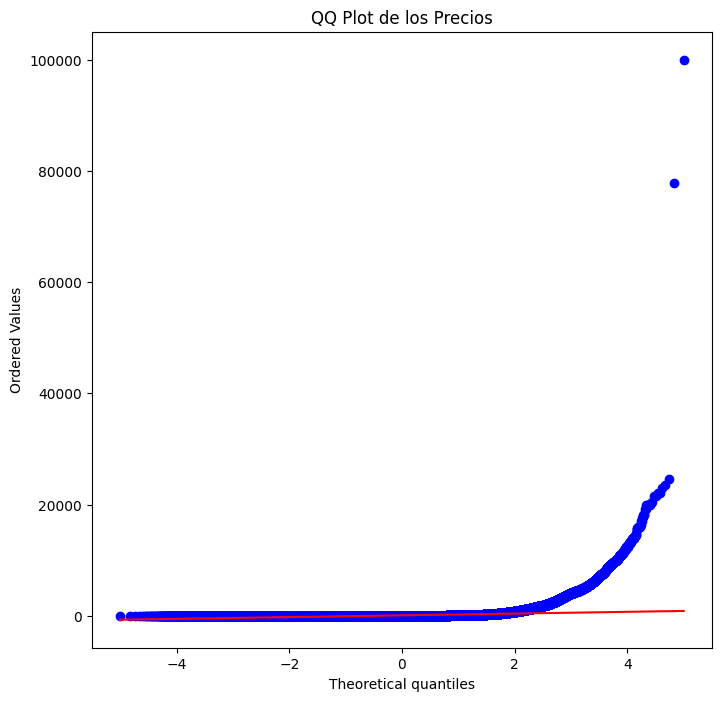

In [59]:
plt.figure(figsize=(8, 8))
stats.probplot(df["price"], dist="norm", plot=plt)
plt.title("QQ Plot de los Precios")
plt.show()


C:\Users\hugoe\AppData\Local\Temp\ipykernel_12952\925825826.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="category", y="price", data=df, palette="muted")


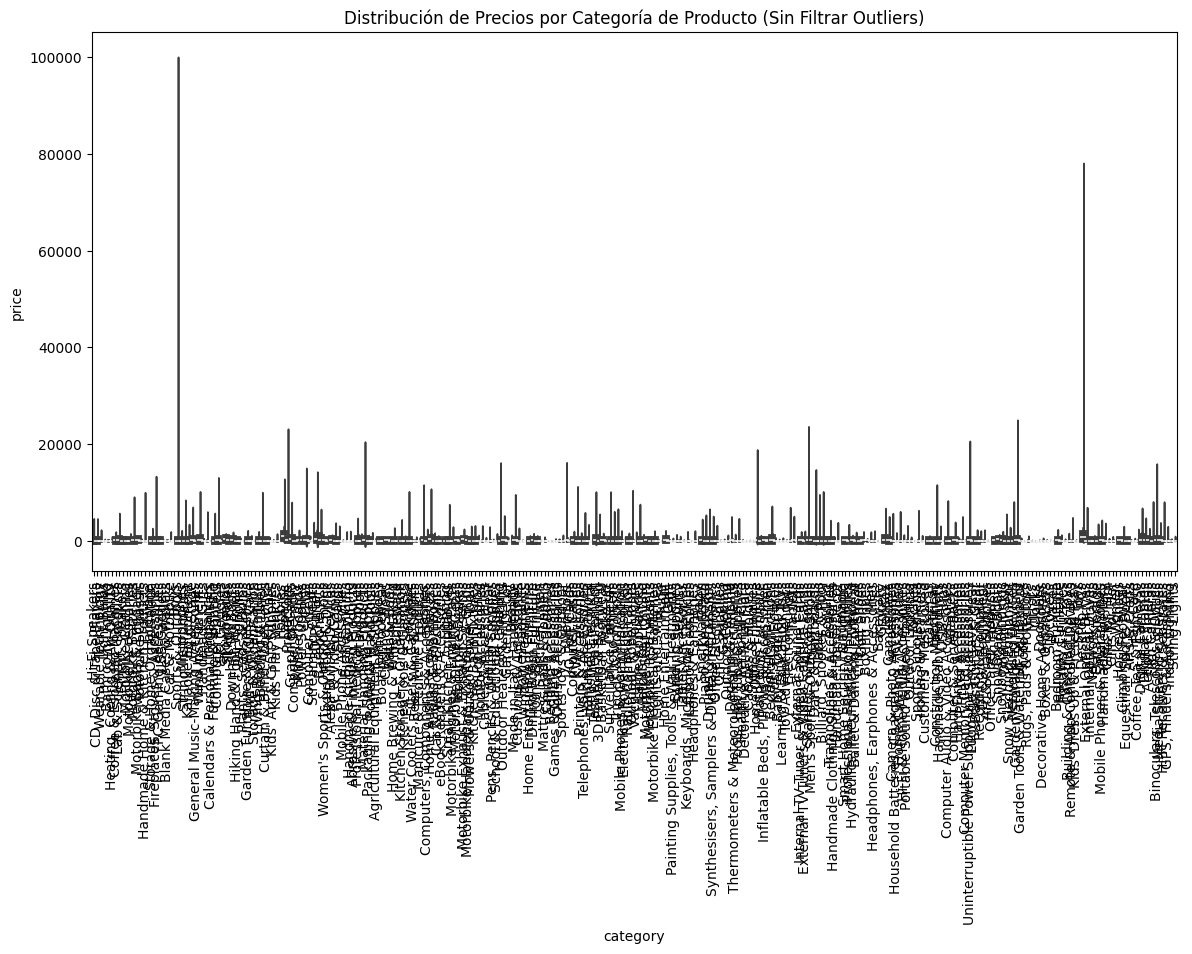

In [60]:
plt.figure(figsize=(14, 7))
sns.violinplot(x="category", y="price", data=df, palette="muted")
plt.title("Distribución de Precios por Categoría de Producto (Sin Filtrar Outliers)")
plt.xticks(rotation=90)
plt.show()

In [61]:
correlation_no_outliers, p_value_no_outliers = pearsonr(df["price"], df["stars"])
correlation_no_outliers, p_value_no_outliers

(-0.12490673262148642, 0.0)